## Part A: Sentiment Analysis

### 1. Setup and Data Loading

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [9]:
# Load processed data from EDA
print("Loading data...")
reddit_df = pd.read_csv('eda_output/reddit_processed.csv')
youtube_df = pd.read_csv('eda_output/youtube_processed.csv')

print(f"✓ Reddit data: {len(reddit_df):,} rows")
print(f"✓ YouTube data: {len(youtube_df):,} rows")

Loading data...
✓ Reddit data: 9,973 rows
✓ YouTube data: 9,389 rows
✓ Reddit data: 9,973 rows
✓ YouTube data: 9,389 rows


In [10]:
# Initialize sentiment analyzers
vader = SentimentIntensityAnalyzer()
print("✓ VADER Sentiment Analyzer initialized")
print("✓ TextBlob Sentiment Analyzer ready")

# Identify columns
reddit_text_col = 'self_text' if 'self_text' in reddit_df.columns else 'clean_text_comments'
youtube_text_col = 'text'
reddit_label_col = 'Label' if 'Label' in reddit_df.columns else 'label'
youtube_label_col = 'label' if 'label' in youtube_df.columns else 'Label'

print(f"\n✓ Using Reddit text column: {reddit_text_col}")
print(f"✓ Using YouTube text column: {youtube_text_col}")

✓ VADER Sentiment Analyzer initialized
✓ TextBlob Sentiment Analyzer ready

✓ Using Reddit text column: self_text
✓ Using YouTube text column: text


### 2. Sentiment Analysis Functions

In [11]:
def get_vader_sentiment(text):
    """Get VADER sentiment scores"""
    if pd.isna(text) or text == '':
        return {'compound': 0, 'pos': 0, 'neu': 0, 'neg': 0, 'label': 'neutral'}
    
    scores = vader.polarity_scores(str(text))
    
    # Classify based on compound score
    if scores['compound'] >= 0.05:
        label = 'positive'
    elif scores['compound'] <= -0.05:
        label = 'negative'
    else:
        label = 'neutral'
    
    scores['label'] = label
    return scores


def get_textblob_sentiment(text):
    """Get TextBlob sentiment scores"""
    if pd.isna(text) or text == '':
        return {'polarity': 0, 'subjectivity': 0, 'label': 'neutral'}
    
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Classify based on polarity
    if polarity > 0.1:
        label = 'positive'
    elif polarity < -0.1:
        label = 'negative'
    else:
        label = 'neutral'
    
    return {
        'polarity': polarity,
        'subjectivity': subjectivity,
        'label': label
    }

print("✓ Sentiment analysis functions defined")

✓ Sentiment analysis functions defined


### 3. Apply VADER Sentiment Analysis

In [12]:
# Reddit VADER
print("Analyzing Reddit sentiment with VADER...")
reddit_vader = reddit_df[reddit_text_col].fillna('').astype(str).apply(get_vader_sentiment)

reddit_df['vader_compound'] = reddit_vader.apply(lambda x: x['compound'])
reddit_df['vader_pos'] = reddit_vader.apply(lambda x: x['pos'])
reddit_df['vader_neu'] = reddit_vader.apply(lambda x: x['neu'])
reddit_df['vader_neg'] = reddit_vader.apply(lambda x: x['neg'])
reddit_df['vader_label'] = reddit_vader.apply(lambda x: x['label'])

print("✓ Reddit VADER analysis complete")
print("\nSentiment Distribution:")
print(reddit_df['vader_label'].value_counts())

Analyzing Reddit sentiment with VADER...
✓ Reddit VADER analysis complete

Sentiment Distribution:
vader_label
negative    4499
positive    3326
neutral     2148
Name: count, dtype: int64
✓ Reddit VADER analysis complete

Sentiment Distribution:
vader_label
negative    4499
positive    3326
neutral     2148
Name: count, dtype: int64


In [13]:
# YouTube VADER
print("Analyzing YouTube sentiment with VADER...")
youtube_vader = youtube_df[youtube_text_col].fillna('').astype(str).apply(get_vader_sentiment)

youtube_df['vader_compound'] = youtube_vader.apply(lambda x: x['compound'])
youtube_df['vader_pos'] = youtube_vader.apply(lambda x: x['pos'])
youtube_df['vader_neu'] = youtube_vader.apply(lambda x: x['neu'])
youtube_df['vader_neg'] = youtube_vader.apply(lambda x: x['neg'])
youtube_df['vader_label'] = youtube_vader.apply(lambda x: x['label'])

print("✓ YouTube VADER analysis complete")
print("\nSentiment Distribution:")
print(youtube_df['vader_label'].value_counts())

Analyzing YouTube sentiment with VADER...
✓ YouTube VADER analysis complete

Sentiment Distribution:
vader_label
positive    4204
negative    3056
neutral     2129
Name: count, dtype: int64
✓ YouTube VADER analysis complete

Sentiment Distribution:
vader_label
positive    4204
negative    3056
neutral     2129
Name: count, dtype: int64


### 4. Apply TextBlob Sentiment Analysis

In [14]:
# Reddit TextBlob
print("Analyzing Reddit sentiment with TextBlob...")
reddit_textblob = reddit_df[reddit_text_col].fillna('').astype(str).apply(get_textblob_sentiment)

reddit_df['textblob_polarity'] = reddit_textblob.apply(lambda x: x['polarity'])
reddit_df['textblob_subjectivity'] = reddit_textblob.apply(lambda x: x['subjectivity'])
reddit_df['textblob_label'] = reddit_textblob.apply(lambda x: x['label'])

print("✓ Reddit TextBlob analysis complete")
print("\nSentiment Distribution:")
print(reddit_df['textblob_label'].value_counts())

Analyzing Reddit sentiment with TextBlob...
✓ Reddit TextBlob analysis complete

Sentiment Distribution:
textblob_label
neutral     5246
positive    3235
negative    1492
Name: count, dtype: int64
✓ Reddit TextBlob analysis complete

Sentiment Distribution:
textblob_label
neutral     5246
positive    3235
negative    1492
Name: count, dtype: int64


In [15]:
# YouTube TextBlob
print("Analyzing YouTube sentiment with TextBlob...")
youtube_textblob = youtube_df[youtube_text_col].fillna('').astype(str).apply(get_textblob_sentiment)

youtube_df['textblob_polarity'] = youtube_textblob.apply(lambda x: x['polarity'])
youtube_df['textblob_subjectivity'] = youtube_textblob.apply(lambda x: x['subjectivity'])
youtube_df['textblob_label'] = youtube_textblob.apply(lambda x: x['label'])

print("✓ YouTube TextBlob analysis complete")
print("\nSentiment Distribution:")
print(youtube_df['textblob_label'].value_counts())

Analyzing YouTube sentiment with TextBlob...
✓ YouTube TextBlob analysis complete

Sentiment Distribution:
textblob_label
neutral     5129
positive    3045
negative    1215
Name: count, dtype: int64
✓ YouTube TextBlob analysis complete

Sentiment Distribution:
textblob_label
neutral     5129
positive    3045
negative    1215
Name: count, dtype: int64


### 5. Sentiment Distribution Visualizations

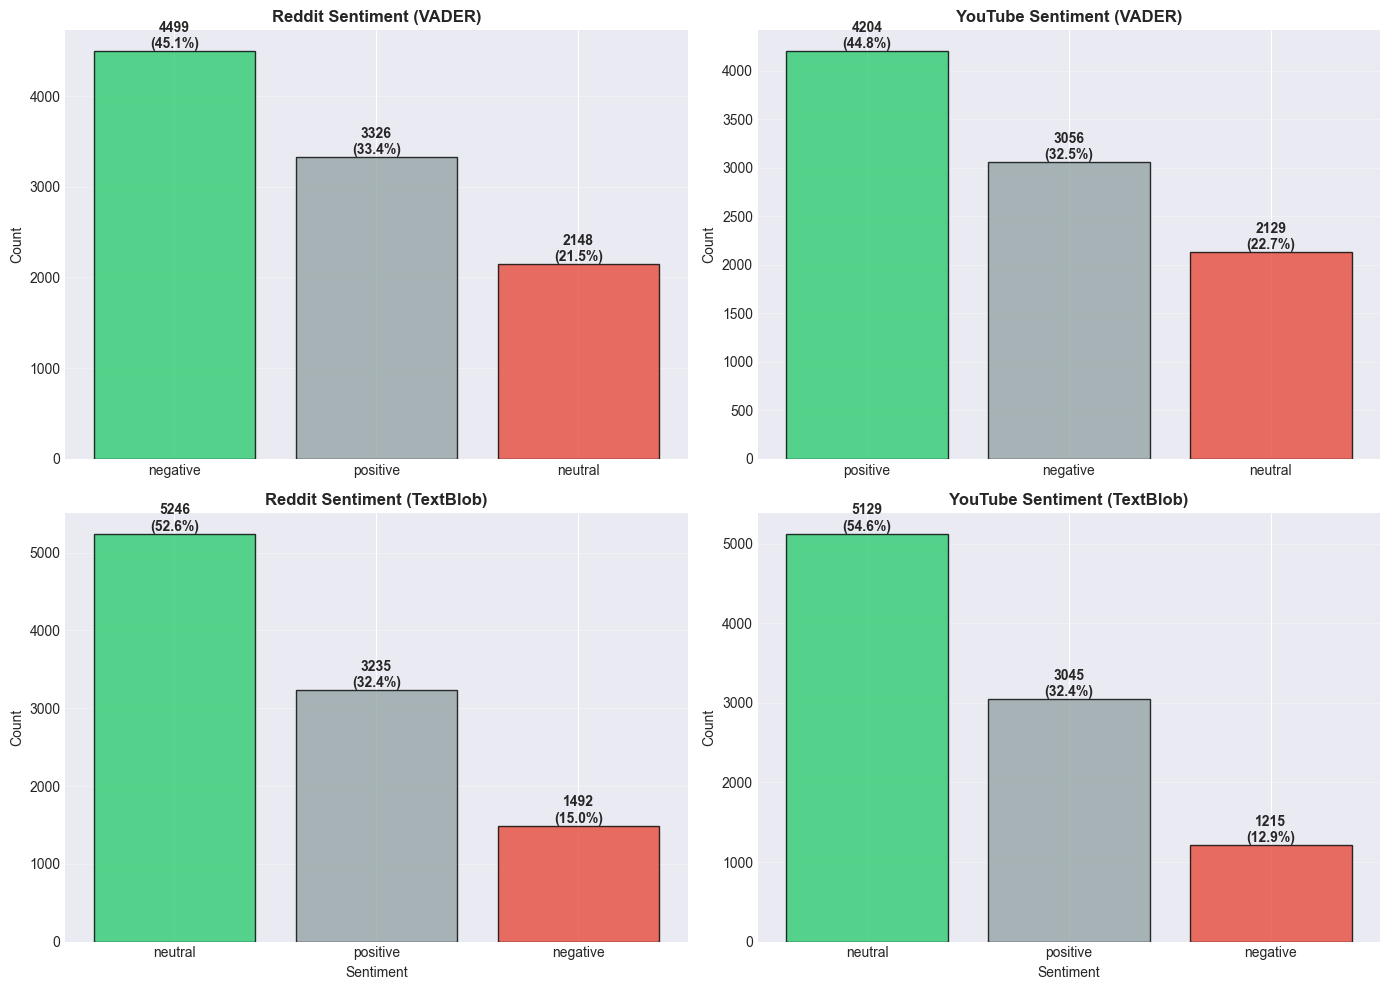

In [16]:
# Compare sentiment methods
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors_sent = ['#2ecc71', '#95a5a6', '#e74c3c']  # positive, neutral, negative

# Reddit VADER
reddit_vader_counts = reddit_df['vader_label'].value_counts()
axes[0, 0].bar(reddit_vader_counts.index, reddit_vader_counts.values, color=colors_sent, alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Reddit Sentiment (VADER)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(reddit_vader_counts.values):
    axes[0, 0].text(i, v, f'{v}\n({v/reddit_vader_counts.sum()*100:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')

# YouTube VADER
youtube_vader_counts = youtube_df['vader_label'].value_counts()
axes[0, 1].bar(youtube_vader_counts.index, youtube_vader_counts.values, color=colors_sent, alpha=0.8, edgecolor='black')
axes[0, 1].set_title('YouTube Sentiment (VADER)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(youtube_vader_counts.values):
    axes[0, 1].text(i, v, f'{v}\n({v/youtube_vader_counts.sum()*100:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')

# Reddit TextBlob
reddit_tb_counts = reddit_df['textblob_label'].value_counts()
axes[1, 0].bar(reddit_tb_counts.index, reddit_tb_counts.values, color=colors_sent, alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Reddit Sentiment (TextBlob)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(reddit_tb_counts.values):
    axes[1, 0].text(i, v, f'{v}\n({v/reddit_tb_counts.sum()*100:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')

# YouTube TextBlob
youtube_tb_counts = youtube_df['textblob_label'].value_counts()
axes[1, 1].bar(youtube_tb_counts.index, youtube_tb_counts.values, color=colors_sent, alpha=0.8, edgecolor='black')
axes[1, 1].set_title('YouTube Sentiment (TextBlob)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(youtube_tb_counts.values):
    axes[1, 1].text(i, v, f'{v}\n({v/youtube_tb_counts.sum()*100:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 6. Sentiment-Stance Correlation Analysis

**Research Question 1**: How are narratives and sentiments represented across platforms?

In [17]:
# Sentiment by stance - Reddit
print("="*80)
print("REDDIT: Sentiment Statistics by Stance (VADER)")
print("="*80)

reddit_sentiment_by_stance = reddit_df.groupby(reddit_label_col).agg({
    'vader_compound': ['mean', 'median', 'std'],
    'vader_pos': 'mean',
    'vader_neg': 'mean',
    'vader_neu': 'mean'
}).round(3)

display(reddit_sentiment_by_stance)

REDDIT: Sentiment Statistics by Stance (VADER)


vader_compound               vader_pos vader_neg vader_neu
                mean median    std      mean      mean      mean
Label                                                           
I             -0.225 -0.285  0.565     0.100     0.138     0.763
N             -0.036  0.000  0.499     0.098     0.096     0.806
P             -0.120  0.000  0.552     0.105     0.118     0.778

In [18]:
# Sentiment by stance - YouTube
print("="*80)
print("YOUTUBE: Sentiment Statistics by Stance (VADER)")
print("="*80)

youtube_sentiment_by_stance = youtube_df.groupby(youtube_label_col).agg({
    'vader_compound': ['mean', 'median', 'std'],
    'vader_pos': 'mean',
    'vader_neg': 'mean',
    'vader_neu': 'mean'
}).round(3)

display(youtube_sentiment_by_stance)

YOUTUBE: Sentiment Statistics by Stance (VADER)


vader_compound               vader_pos vader_neg vader_neu
                mean median    std      mean      mean      mean
label                                                           
I              0.012    0.0  0.590     0.170     0.126     0.704
N              0.090    0.0  0.506     0.166     0.121     0.713
P              0.106    0.0  0.591     0.246     0.120     0.634

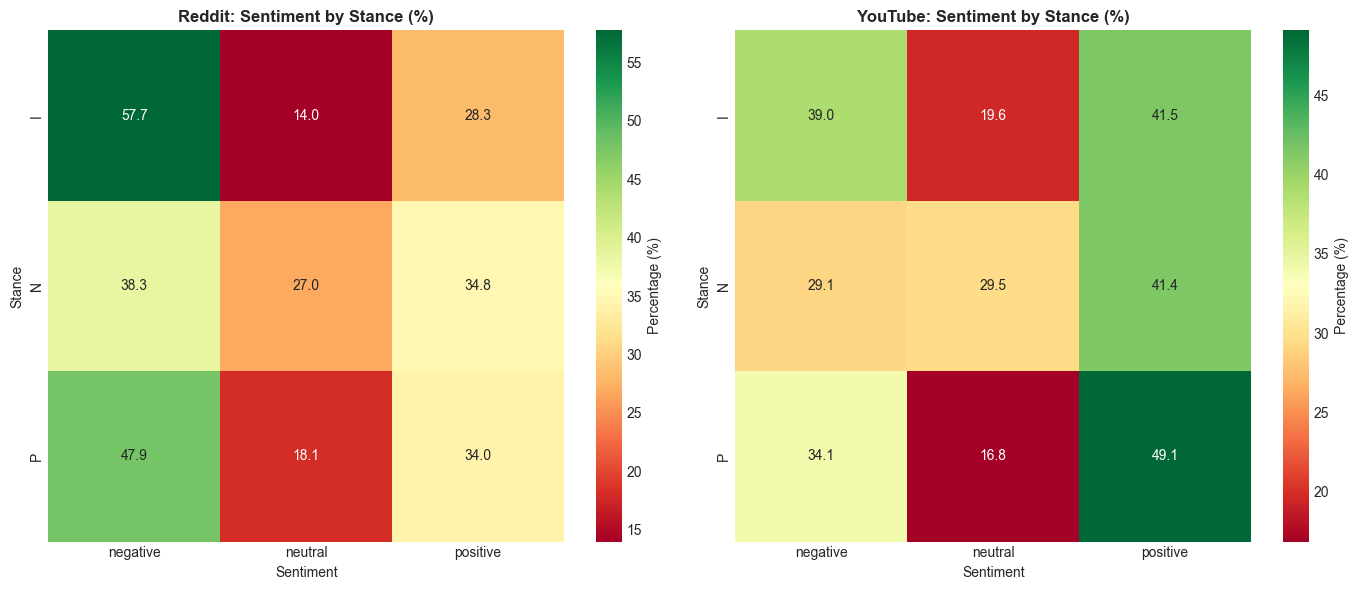

In [19]:
# Heatmap: Sentiment distribution by stance
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Reddit
reddit_crosstab = pd.crosstab(reddit_df[reddit_label_col], reddit_df['vader_label'], normalize='index') * 100
sns.heatmap(reddit_crosstab, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[0], 
            cbar_kws={'label': 'Percentage (%)'})
axes[0].set_title('Reddit: Sentiment by Stance (%)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Stance')

# YouTube
youtube_crosstab = pd.crosstab(youtube_df[youtube_label_col], youtube_df['vader_label'], normalize='index') * 100
sns.heatmap(youtube_crosstab, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[1],
            cbar_kws={'label': 'Percentage (%)'})
axes[1].set_title('YouTube: Sentiment by Stance (%)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Stance')

plt.tight_layout()
plt.show()

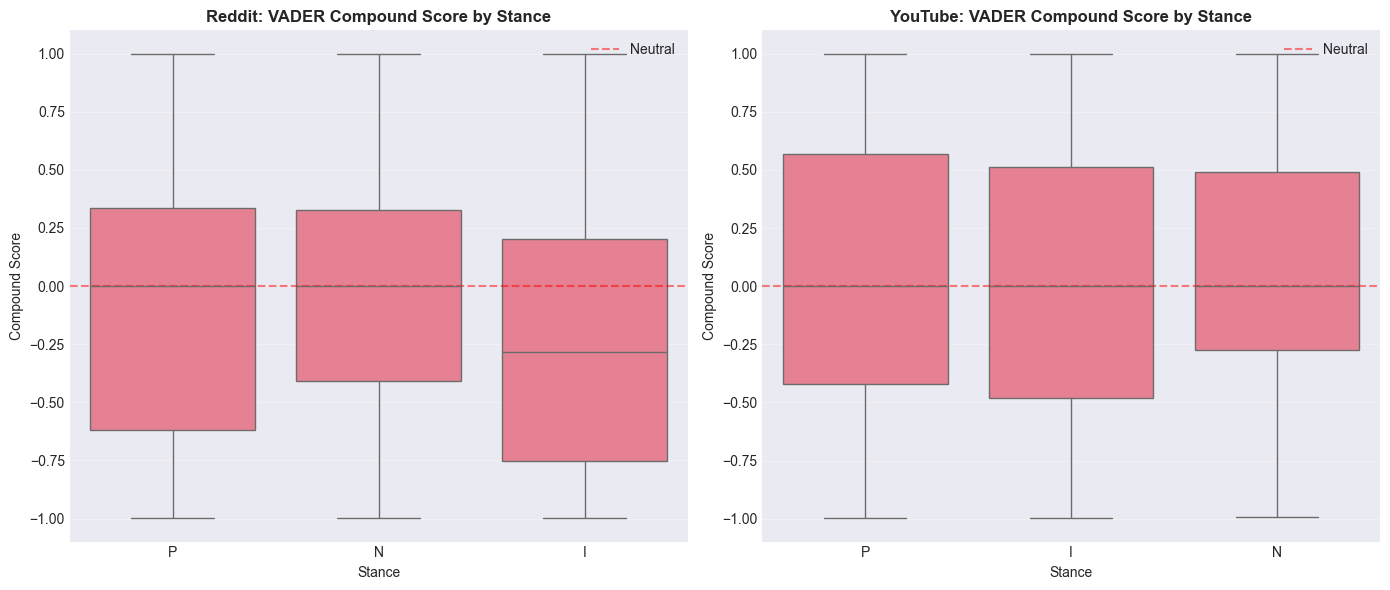

In [20]:
# Box plots: Compound scores by stance
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Reddit
sns.boxplot(data=reddit_df, x=reddit_label_col, y='vader_compound', ax=axes[0])
axes[0].set_title('Reddit: VADER Compound Score by Stance', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Stance')
axes[0].set_ylabel('Compound Score')
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Neutral')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# YouTube
sns.boxplot(data=youtube_df, x=youtube_label_col, y='vader_compound', ax=axes[1])
axes[1].set_title('YouTube: VADER Compound Score by Stance', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Stance')
axes[1].set_ylabel('Compound Score')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Neutral')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 7. Polarity vs Subjectivity Analysis

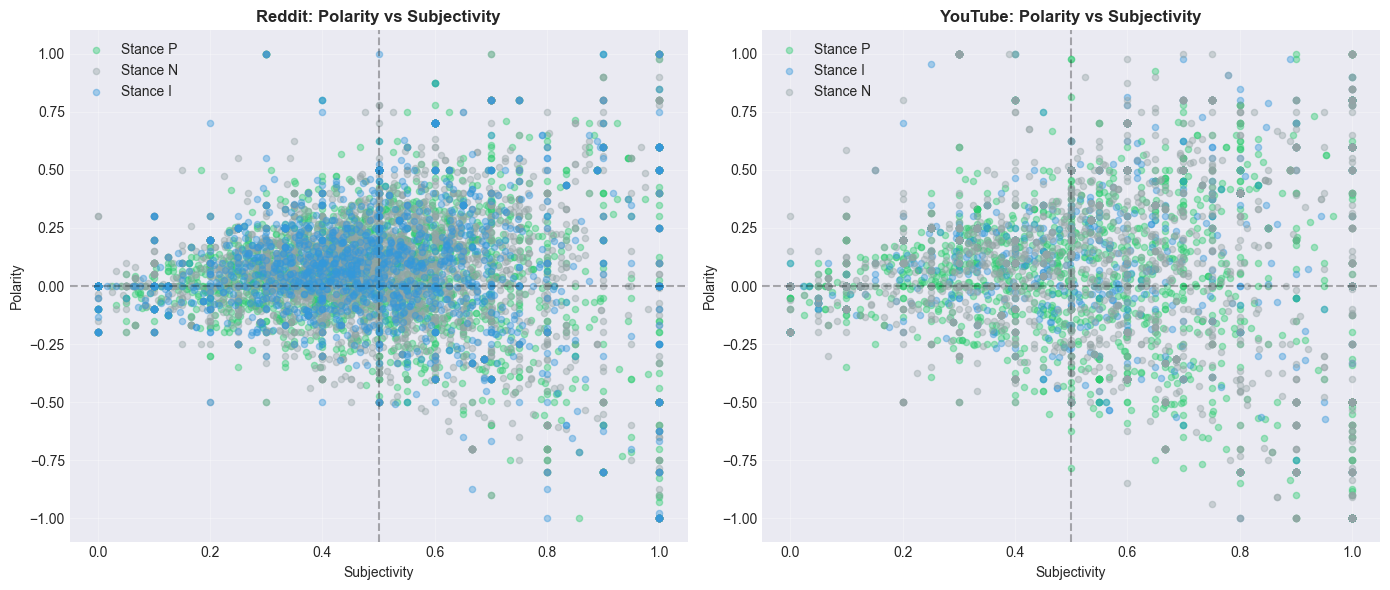

In [21]:
# Scatter plot: Polarity vs Subjectivity
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

stance_colors = {'P': '#2ecc71', 'I': '#3498db', 'N': '#95a5a6'}

# Reddit
for stance in reddit_df[reddit_label_col].unique():
    if pd.notna(stance):
        subset = reddit_df[reddit_df[reddit_label_col] == stance]
        axes[0].scatter(subset['textblob_subjectivity'], subset['textblob_polarity'], 
                       alpha=0.4, label=f'Stance {stance}', 
                       c=stance_colors.get(stance, '#95a5a6'), s=20)

axes[0].set_title('Reddit: Polarity vs Subjectivity', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Subjectivity')
axes[0].set_ylabel('Polarity')
axes[0].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[0].axvline(x=0.5, color='black', linestyle='--', alpha=0.3)
axes[0].legend()
axes[0].grid(alpha=0.3)

# YouTube
for stance in youtube_df[youtube_label_col].unique():
    if pd.notna(stance):
        subset = youtube_df[youtube_df[youtube_label_col] == stance]
        axes[1].scatter(subset['textblob_subjectivity'], subset['textblob_polarity'], 
                       alpha=0.4, label=f'Stance {stance}', 
                       c=stance_colors.get(stance, '#95a5a6'), s=20)

axes[1].set_title('YouTube: Polarity vs Subjectivity', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Subjectivity')
axes[1].set_ylabel('Polarity')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x=0.5, color='black', linestyle='--', alpha=0.3)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 8. Platform Comparison

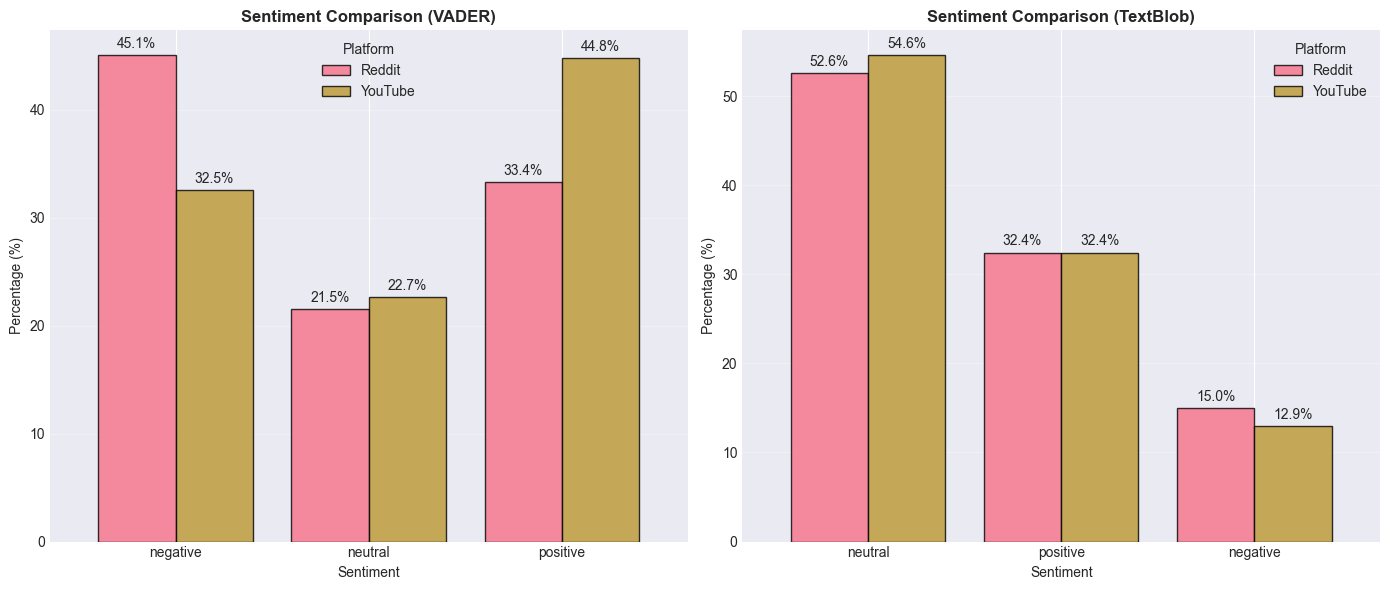

In [22]:
# Compare sentiment distribution across platforms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# VADER comparison
vader_comparison = pd.DataFrame({
    'Reddit': reddit_df['vader_label'].value_counts(normalize=True) * 100,
    'YouTube': youtube_df['vader_label'].value_counts(normalize=True) * 100
}).fillna(0)

vader_comparison.plot(kind='bar', ax=axes[0], width=0.8, alpha=0.8, edgecolor='black')
axes[0].set_title('Sentiment Comparison (VADER)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Percentage (%)')
axes[0].legend(title='Platform')
axes[0].grid(axis='y', alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=0)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', padding=3)

# TextBlob comparison
textblob_comparison = pd.DataFrame({
    'Reddit': reddit_df['textblob_label'].value_counts(normalize=True) * 100,
    'YouTube': youtube_df['textblob_label'].value_counts(normalize=True) * 100
}).fillna(0)

textblob_comparison.plot(kind='bar', ax=axes[1], width=0.8, alpha=0.8, edgecolor='black')
axes[1].set_title('Sentiment Comparison (TextBlob)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title='Platform')
axes[1].grid(axis='y', alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=0)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

### 9. Save Sentiment-Enhanced Data

In [23]:
# Save data with sentiment scores
import os
if not os.path.exists('sentiment_output'):
    os.makedirs('sentiment_output')

reddit_df.to_csv('sentiment_output/reddit_with_sentiment.csv', index=False, encoding='utf-8')
youtube_df.to_csv('sentiment_output/youtube_with_sentiment.csv', index=False, encoding='utf-8')

print("✓ Sentiment-enhanced data saved to sentiment_output/")
print("  - reddit_with_sentiment.csv")
print("  - youtube_with_sentiment.csv")

✓ Sentiment-enhanced data saved to sentiment_output/
  - reddit_with_sentiment.csv
  - youtube_with_sentiment.csv


---

## Part B: Topic Modeling

### 10. Text Preprocessing for Topic Modeling

In [24]:
# Import additional libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import re
from collections import Counter

print("✓ Topic modeling libraries imported")

✓ Topic modeling libraries imported


In [25]:
# Text cleaning function
def clean_text(text):
    """Clean text for topic modeling"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Clean texts
print("Cleaning texts...")
reddit_df['cleaned_text'] = reddit_df[reddit_text_col].apply(clean_text)
youtube_df['cleaned_text'] = youtube_df[youtube_text_col].apply(clean_text)

# Remove very short texts
reddit_df = reddit_df[reddit_df['cleaned_text'].str.len() > 20]
youtube_df = youtube_df[youtube_df['cleaned_text'].str.len() > 20]

print(f"✓ Cleaned Reddit: {len(reddit_df):,} texts")
print(f"✓ Cleaned YouTube: {len(youtube_df):,} texts")

Cleaning texts...
✓ Cleaned Reddit: 9,262 texts
✓ Cleaned YouTube: 7,449 texts
✓ Cleaned Reddit: 9,262 texts
✓ Cleaned YouTube: 7,449 texts


### 11. Word Frequency Analysis

In [26]:
# Domain-specific stopwords to exclude
domain_stopwords = [
    'israel', 'israeli', 'palestine', 'palestinian', 'hamas', 'gaza', 'war',
    'conflict', 'just', 'like', 'people', 'know', 'think', 'going', 'said'
]

def get_top_words(texts, n=20, stopwords=None):
    """Get top N words"""
    vectorizer = CountVectorizer(max_features=n, stop_words='english')
    if stopwords:
        all_stops = list(set(list(vectorizer.get_stop_words()) + stopwords))
        vectorizer = CountVectorizer(max_features=n, stop_words=all_stops)
    
    X = vectorizer.fit_transform(texts)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    return Counter(word_freq).most_common(n)

# Get top words
reddit_top_words = get_top_words(reddit_df['cleaned_text'], n=20, stopwords=domain_stopwords)
youtube_top_words = get_top_words(youtube_df['cleaned_text'], n=20, stopwords=domain_stopwords)

print("✓ Word frequency analysis complete")

✓ Word frequency analysis complete


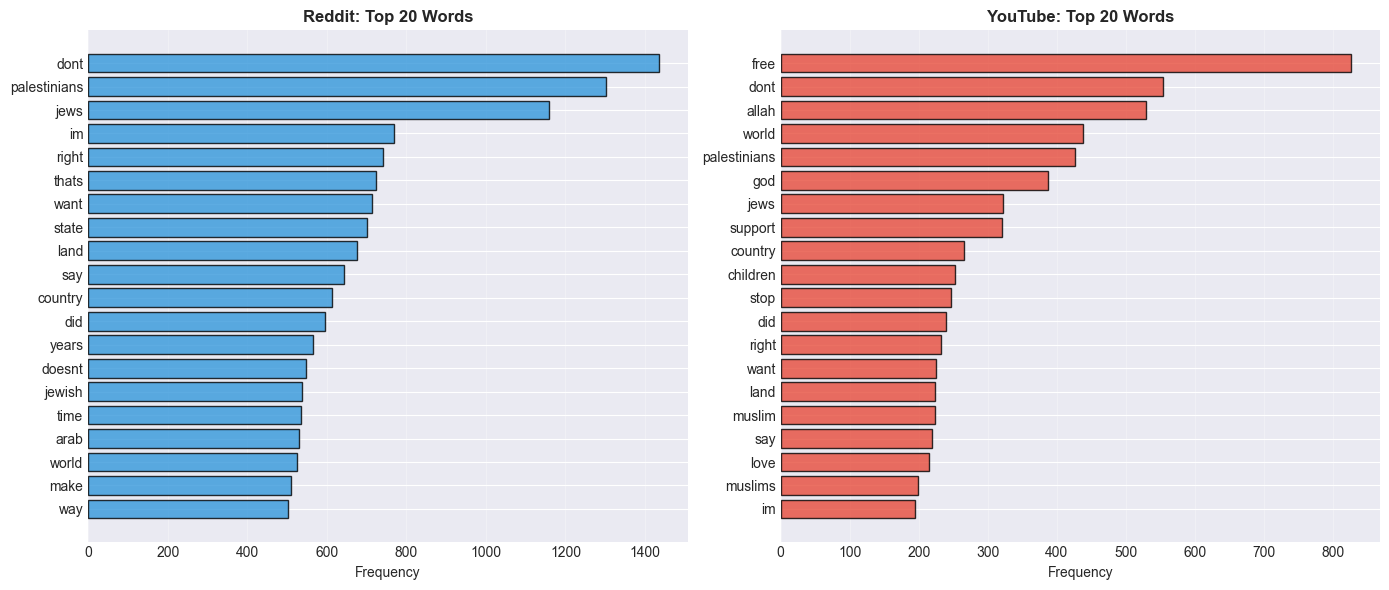

In [27]:
# Visualize word frequencies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Reddit
words = [word for word, count in reddit_top_words]
counts = [count for word, count in reddit_top_words]
axes[0].barh(words, counts, color='#3498db', alpha=0.8, edgecolor='black')
axes[0].set_title('Reddit: Top 20 Words', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# YouTube
words = [word for word, count in youtube_top_words]
counts = [count for word, count in youtube_top_words]
axes[1].barh(words, counts, color='#e74c3c', alpha=0.8, edgecolor='black')
axes[1].set_title('YouTube: Top 20 Words', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 12. Topic Modeling with LDA

In [28]:
# LDA parameters
n_topics = 5
n_top_words = 10

# Reddit LDA
print("Running LDA on Reddit data...")
reddit_vectorizer = CountVectorizer(max_df=0.95, min_df=5, max_features=1000, stop_words='english')
reddit_tf = reddit_vectorizer.fit_transform(reddit_df['cleaned_text'])

reddit_lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20)
reddit_lda.fit(reddit_tf)

print("✓ Reddit LDA complete")

Running LDA on Reddit data...
✓ Reddit LDA complete
✓ Reddit LDA complete


In [29]:
# Display Reddit LDA topics
print("="*80)
print(f"REDDIT LDA TOPICS (Top {n_top_words} words per topic)")
print("="*80)

reddit_feature_names = reddit_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(reddit_lda.components_):
    top_words_idx = topic.argsort()[-n_top_words:][::-1]
    top_words = [reddit_feature_names[i] for i in top_words_idx]
    print(f"\nTopic {topic_idx + 1}: {', '.join(top_words)}")

REDDIT LDA TOPICS (Top 10 words per topic)

Topic 1: jews, israel, palestinians, land, state, jewish, arab, people, arabs, palestine

Topic 2: people, dont, like, just, im, think, know, youre, say, thats

Topic 3: iran, countries, country, like, just, war, russia, people, houthis, aid

Topic 4: genocide, israel, children, war, military, human, right, crimes, case, law

Topic 5: hamas, israel, gaza, palestinians, people, civilians, israeli, war, palestinian, idf


In [30]:
# YouTube LDA
print("\nRunning LDA on YouTube data...")
youtube_vectorizer = CountVectorizer(max_df=0.95, min_df=5, max_features=1000, stop_words='english')
youtube_tf = youtube_vectorizer.fit_transform(youtube_df['cleaned_text'])

youtube_lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20)
youtube_lda.fit(youtube_tf)

print("✓ YouTube LDA complete")


Running LDA on YouTube data...
✓ YouTube LDA complete
✓ YouTube LDA complete


In [31]:
# Display YouTube LDA topics
print("="*80)
print(f"YOUTUBE LDA TOPICS (Top {n_top_words} words per topic)")
print("="*80)

youtube_feature_names = youtube_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(youtube_lda.components_):
    top_words_idx = topic.argsort()[-n_top_words:][::-1]
    top_words = [youtube_feature_names[i] for i in top_words_idx]
    print(f"\nTopic {topic_idx + 1}: {', '.join(top_words)}")

YOUTUBE LDA TOPICS (Top 10 words per topic)

Topic 1: israel, jews, land, palestinians, country, palestinian, palestine, world, countries, state

Topic 2: israel, hamas, people, support, children, war, im, innocent, stop, did

Topic 3: palestine, free, allah, stand, help, ya, al, israel, protect, palestina

Topic 4: dont, like, people, gaza, hamas, just, israel, know, think, thats

Topic 5: god, israel, india, love, hai, bless, man, jesus, people, world


### 13. Topic Modeling with NMF

In [32]:
# Reddit NMF
print("Running NMF on Reddit data...")
reddit_tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, max_features=1000, stop_words='english')
reddit_tfidf = reddit_tfidf_vectorizer.fit_transform(reddit_df['cleaned_text'])

reddit_nmf = NMF(n_components=n_topics, random_state=42, max_iter=200)
reddit_nmf.fit(reddit_tfidf)

print("✓ Reddit NMF complete")

Running NMF on Reddit data...
✓ Reddit NMF complete
✓ Reddit NMF complete


In [33]:
# Display Reddit NMF topics
print("="*80)
print(f"REDDIT NMF TOPICS (Top {n_top_words} words per topic)")
print("="*80)

reddit_tfidf_features = reddit_tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(reddit_nmf.components_):
    top_words_idx = topic.argsort()[-n_top_words:][::-1]
    top_words = [reddit_tfidf_features[i] for i in top_words_idx]
    print(f"\nTopic {topic_idx + 1}: {', '.join(top_words)}")

REDDIT NMF TOPICS (Top 10 words per topic)

Topic 1: people, dont, think, know, im, want, thats, youre, say, really

Topic 2: hamas, gaza, civilians, idf, rockets, hostages, war, terrorist, aid, killed

Topic 3: israel, jews, palestinians, state, land, palestine, palestinian, gaza, war, arab

Topic 4: like, looks, sounds, look, feel, theyre, lot, israeli, world, mean

Topic 5: just, point, youre, thats, say, new, shit, doesnt, bad, theyre


In [34]:
# YouTube NMF
print("\nRunning NMF on YouTube data...")
youtube_tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, max_features=1000, stop_words='english')
youtube_tfidf = youtube_tfidf_vectorizer.fit_transform(youtube_df['cleaned_text'])

youtube_nmf = NMF(n_components=n_topics, random_state=42, max_iter=200)
youtube_nmf.fit(youtube_tfidf)

print("✓ YouTube NMF complete")


Running NMF on YouTube data...
✓ YouTube NMF complete
✓ YouTube NMF complete


In [35]:
# Display YouTube NMF topics
print("="*80)
print(f"YOUTUBE NMF TOPICS (Top {n_top_words} words per topic)")
print("="*80)

youtube_tfidf_features = youtube_tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(youtube_nmf.components_):
    top_words_idx = topic.argsort()[-n_top_words:][::-1]
    top_words = [youtube_tfidf_features[i] for i in top_words_idx]
    print(f"\nTopic {topic_idx + 1}: {', '.join(top_words)}")

YOUTUBE NMF TOPICS (Top 10 words per topic)

Topic 1: free, palestine, stand, palestina, river, sea, support, love, inshallah, im

Topic 2: israel, support, stand, india, god, terrorist, bless, right, gaza, war

Topic 3: people, dont, like, just, world, know, war, support, god, want

Topic 4: hamas, gaza, terrorists, palestinians, terrorist, did, blame, hiding, bank, west

Topic 5: allah, help, ya, protect, sha, palestine, bless, god, ameen, swt


### 14. Topic Visualization

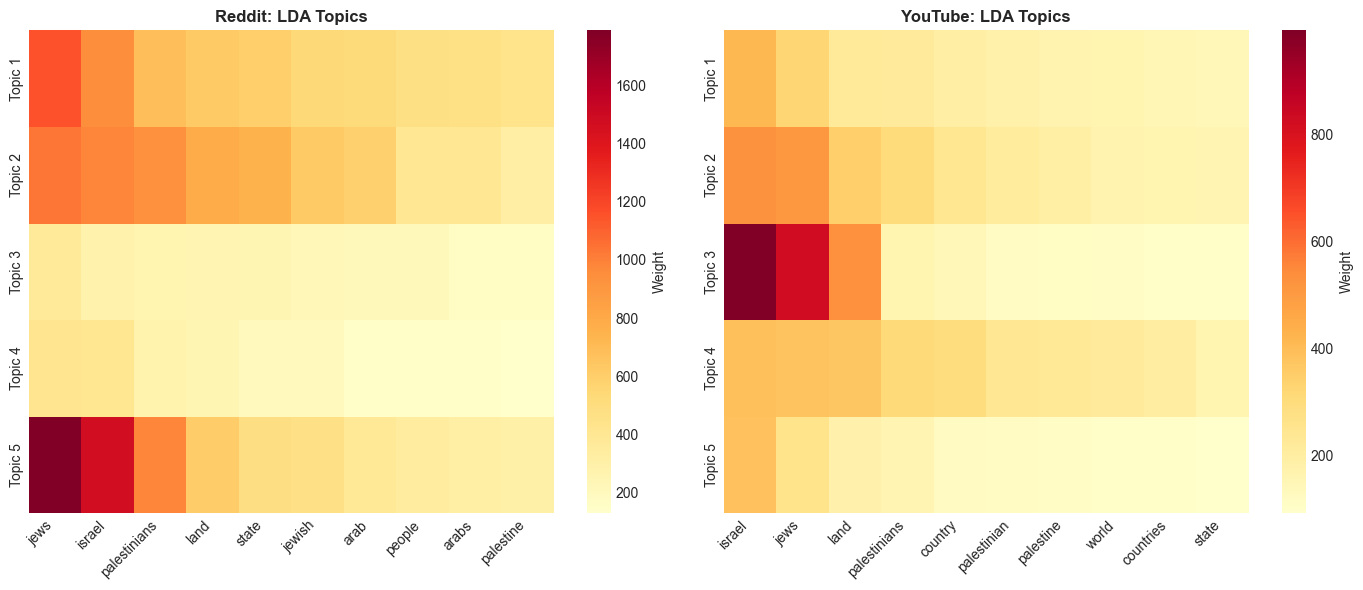

In [36]:
# Visualize LDA topics as heatmap
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Reddit LDA heatmap
reddit_heatmap_data = []
reddit_top_words_list = []
for i, topic in enumerate(reddit_lda.components_):
    top_10_idx = topic.argsort()[-10:][::-1]
    reddit_heatmap_data.append(topic[top_10_idx])
    reddit_top_words_list.append([reddit_feature_names[j] for j in top_10_idx])

import seaborn as sns
sns.heatmap(reddit_heatmap_data, xticklabels=reddit_top_words_list[0],
            yticklabels=[f'Topic {i+1}' for i in range(n_topics)],
            cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Weight'})
axes[0].set_title('Reddit: LDA Topics', fontsize=12, fontweight='bold')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# YouTube LDA heatmap
youtube_heatmap_data = []
youtube_top_words_list = []
for i, topic in enumerate(youtube_lda.components_):
    top_10_idx = topic.argsort()[-10:][::-1]
    youtube_heatmap_data.append(topic[top_10_idx])
    youtube_top_words_list.append([youtube_feature_names[j] for j in top_10_idx])

sns.heatmap(youtube_heatmap_data, xticklabels=youtube_top_words_list[0],
            yticklabels=[f'Topic {i+1}' for i in range(n_topics)],
            cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Weight'})
axes[1].set_title('YouTube: LDA Topics', fontsize=12, fontweight='bold')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 15. Key Findings Summary

### Sentiment Analysis Insights:
- Sentiment patterns vary significantly by stance
- Platform-specific sentiment tendencies observed
- Correlation between stance and emotional tone

### Topic Modeling Insights:
- Identified 5 main topics per platform
- Different narrative themes on Reddit vs YouTube
- Key terms reveal framing differences

### Research Question Answers:

**RQ1: Narratives and Sentiments**
- Clear sentiment-stance correlations
- Platform-specific narrative patterns
- Different emotional tones by position

**RQ3: Platform Differences**
- Reddit: More nuanced, multi-topic discussions
- YouTube: More reactive, focused themes
- Content length influences narrative depth

---

### Next Steps:
1. Statistical significance testing (Chi-square, ANOVA)
2. Engagement-sentiment correlation analysis
3. Temporal analysis if timestamps available
4. Deep dive into specific topics by stance